# Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np

# 2. Reading the Preprocessed datasets

In [2]:
df_train=pd.read_csv('/content/Preprocessed_train')
df_test=pd.read_csv('/content/Preprocessed_test')
print(df_train.shape, df_test.shape)

(614, 11) (367, 10)


In [3]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount,Total_Income,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.74359,1.0,1.0,0.601711,0.347520,1
1,1.0,1.0,0.333333,0.0,0.0,0.74359,1.0,0.0,0.601711,0.357583,0
2,1.0,1.0,0.000000,0.0,1.0,0.74359,1.0,1.0,0.447563,0.181795,1
3,1.0,1.0,0.000000,1.0,0.0,0.74359,1.0,1.0,0.586647,0.305642,1
4,1.0,0.0,0.000000,0.0,0.0,0.74359,1.0,1.0,0.624304,0.353847,1


In [4]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount,Total_Income
0,1.0,1.0,0.000000,0.0,0.0,0.74359,1.0,1.0,0.566350,0.341983
1,1.0,1.0,0.333333,0.0,0.0,0.74359,1.0,1.0,0.598035,0.286593
2,1.0,1.0,0.666667,0.0,0.0,0.74359,1.0,1.0,0.715248,0.384917
3,1.0,1.0,0.666667,0.0,0.0,0.74359,1.0,1.0,0.544136,0.302863
4,1.0,0.0,0.000000,1.0,0.0,0.74359,1.0,1.0,0.486329,0.203639


# 3. Check for class Imbalance

In [5]:
class_dist=df_train['Loan_Status'].value_counts()
class_dist

,count
Loan_Status,
1,422
0,192


In [6]:
class_percentage=df_train['Loan_Status'].value_counts(normalize=True)*100
print(round(class_percentage),2)

Loan_Status
1    69.0
0    31.0
Name: proportion, dtype: float64 2


👉 As there is a noticiable difference between the two classes, the dataset is imbalanced. We need to treat this first.

# 4. Resample the Dataset

In [7]:
from sklearn.utils import resample
df_majority=df_train[df_train['Loan_Status']==1]
df_minority=df_train[df_train['Loan_Status']==0]
df_minority_upsampled=resample(df_minority,
                              replace=True,
                              n_samples=len(df_majority),
                              random_state=42)
df_balanced=pd.concat([df_majority,df_minority_upsampled])
print(df_balanced['Loan_Status'].value_counts())

Loan_Status
1    422
0    422
Name: count, dtype: int64


👉 Now the dataset has become balanced.

# 5. Splitting the Dataset into Training and Validation Sets

In [8]:
from sklearn.model_selection import train_test_split
X=df_balanced.drop(['Loan_Status'], axis=1)
y=df_balanced['Loan_Status']
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(675, 10) (169, 10) (675,) (169,)


# 6. Feature Selection

In [9]:
from sklearn.feature_selection import SelectPercentile, chi2
selector=SelectPercentile(score_func=chi2, percentile=80)
selector.fit(X_train, y_train)
X_train_selected=selector.transform(X_train)
selected_features=X_train.columns[selector.get_support()]
print(len(selected_features), selected_features)

8 Index(['Gender', 'Married', 'Dependents', 'Education', 'Credit_History',
       'Property_Area', 'LoanAmount', 'Total_Income'],
      dtype='object')


In [10]:
X_train_new=pd.DataFrame(X_train_selected, columns=selected_features)
X_val_selected=selector.transform(X_val)
X_val_new=pd.DataFrame(X_val_selected, columns=selected_features)
X_val_new.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,LoanAmount,Total_Income
0,1.0,1.0,0.666667,0.0,1.0,1.0,0.747791,0.671845
1,1.0,1.0,0.333333,1.0,1.0,1.0,0.568461,0.310517
2,1.0,1.0,0.666667,0.0,0.0,0.5,0.557715,0.158024
3,0.0,0.0,0.333333,1.0,1.0,0.5,0.433078,0.244806
4,1.0,1.0,0.000000,0.0,1.0,0.5,0.607121,0.323053


In [11]:
X_train_new.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,LoanAmount,Total_Income
0,0.0,0.0,0.333333,1.0,1.0,0.0,0.495099,0.288215
1,1.0,1.0,0.000000,1.0,1.0,1.0,0.601711,0.361986
2,1.0,1.0,0.333333,0.0,0.0,1.0,0.653852,0.570544
3,1.0,0.0,0.333333,0.0,1.0,1.0,0.572625,0.231624
4,0.0,0.0,0.333333,0.0,1.0,1.0,0.332003,0.550744


# 7. Model Building

## 7.1 Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42)
clf.fit(X_train_new, y_train)

LogisticRegression(random_state=42)

In [13]:
y_pred=clf.predict(X_val_new)
print(y_pred[:10])

[1 1 0 0 1 1 0 1 1 1]


In [14]:
print(clf.score(X_val_new, y_val))

0.7396449704142012


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.01, 0.1, 1.0, 10.0],
    'solver':['saga', 'liblinear'],
    'penalty':['l1', 'l2'],
    'max_iter': [100, 200, 300, 500,1000]
    }
grid_search=GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_new, y_train)
best_params=grid_search.best_params_
model1=grid_search.best_estimator_
print(best_params)
print('Model1: ', model1)

{'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Model1:  LogisticRegression(C=10.0, random_state=42, solver='saga')


In [16]:
print(model1.score(X_val_new, y_val))

0.7514792899408284


## 7.2 RandomForest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train_new, y_train)

RandomForestClassifier(random_state=42)

In [18]:
print(clf.score(X_val_new, y_val))

0.9349112426035503


In [19]:
from sklearn.model_selection import RandomizedSearchCV
param_dist={
    'n_estimators' : [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5, 10]
}
rand_search=RandomizedSearchCV(estimator=clf, param_distributions=param_dist, cv=5, scoring='accuracy', n_jobs=-1)
rand_search.fit(X_train_new, y_train)
best_params=rand_search.best_params_
model2=rand_search.best_estimator_
print(best_params)
print('Model2: ', model2)

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Model2:  RandomForestClassifier(random_state=42)


In [20]:
print(model2.score(X_val_new, y_val))

0.9349112426035503


## 7.3 KNeighbors Classifier(KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
param_grid={
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search=GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_new, y_train)
best_params=grid_search.best_params_
model3=grid_search.best_estimator_
print(best_params)
print('Model3: ', model3)

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Model3:  KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')


In [22]:
print(model3.score(X_val_new, y_val))

0.863905325443787


## 7.4 Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=42)
param_grid={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': [0.5, 0.75]
}
grid_search=GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_new, y_train)
best_params=grid_search.best_params_
model4=grid_search.best_estimator_
print(best_params)
print('Model4: ', model4)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 0.5, 'min_samples_split': 2}
Model4:  DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=0.5,
                       random_state=42)


In [24]:
print(model4.score(X_val_new, y_val))

0.8284023668639053


## 7.5 Support Vector Classifier(SVC)

In [25]:
from sklearn.svm import SVC
clf=SVC()
param_grid={
    'C': [0.01, 0.1, 1.0, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'degree': [2, 3, 4],
    'probability': [True, False]
}
grid_search=GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_new, y_train)
best_params=grid_search.best_params_
model5=grid_search.best_estimator_
print(best_params)
print('Model5: ', model5)

{'C': 100, 'degree': 2, 'gamma': 10, 'kernel': 'rbf', 'probability': True}
Model5:  SVC(C=100, degree=2, gamma=10, probability=True)


In [26]:
print(model5.score(X_val_new, y_val))

0.8520710059171598


# 8. Model Comparison

In [27]:
Classifiers=[model1, model2, model3, model4, model5]
Classifiers

[LogisticRegression(C=10.0, random_state=42, solver='saga'),
 RandomForestClassifier(random_state=42),
 KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance'),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=0.5,
                        random_state=42),
 SVC(C=100, degree=2, gamma=10, probability=True)]

#### 8.1 Check Train Accuracies

In [28]:
train_accuracies=[]
for clf in Classifiers:
    clf.fit(X_train_new, y_train)
    train_accuracy=clf.score(X_train_new, y_train)
    train_accuracies.append(train_accuracy)
train_accuracies

[0.7377777777777778, 1.0, 1.0, 1.0, 0.9348148148148148]

In [29]:
compare = pd.DataFrame({
    'Model': [clf.__class__.__name__ for clf in Classifiers],
    'Train_accuracy' : train_accuracies
})
compare=compare.sort_values(by='Train_accuracy', ascending=False)
compare

,Model,Train_accuracy
1,RandomForestClassifier,1.000000
2,KNeighborsClassifier,1.000000
3,DecisionTreeClassifier,1.000000
4,SVC,0.934815
0,LogisticRegression,0.737778


#### 8.2 Check validation set Accuracies

In [30]:
test_accuracies=[]
for clf in Classifiers:
    clf.predict(X_val_new)
    accuracy=clf.score(X_val_new, y_val)
    test_accuracies.append(accuracy)
compare = pd.DataFrame({
    'Model': [clf.__class__.__name__ for clf in Classifiers],
    'Test_accuracy' : test_accuracies
})
compare=compare.sort_values(by='Test_accuracy', ascending=False)
compare

,Model,Test_accuracy
1,RandomForestClassifier,0.934911
2,KNeighborsClassifier,0.863905
4,SVC,0.852071
3,DecisionTreeClassifier,0.828402
0,LogisticRegression,0.751479


	RandomForestClassifier, KNeighborsClassifier, DecisionTreeClassifier seem to be overfitting. We need to fine tune them.

👉 RandomForest, Decision Tree Classifier and KNeighbors algorithm seem to be overfitting. We need to fine_tune them.

#### 8.3 Model Performance Analysis

In [31]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
for clf in Classifiers:
    clf.fit(X_train_new, y_train)
    y_pred=clf.predict(X_train_new)
    y_val_pred=clf.predict(X_val_new)
    print(f"Model: {clf.__class__.__name__}")

    train_accuracy=accuracy_score(y_train, y_pred)*100
    train_precision=precision_score(y_train, y_pred)*100
    train_recall=recall_score(y_train, y_pred)*100
    train_f1=f1_score(y_train, y_pred)*100

    test_accuracy=accuracy_score(y_val, y_val_pred)*100
    test_precision=precision_score(y_val, y_val_pred)*100
    test_recall=recall_score(y_val, y_val_pred)*100
    test_f1=f1_score(y_val, y_val_pred)*100

    print(f"Train Accuracy: {train_accuracy:.2f}, F1_Score: {train_f1:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}")
    print(f"Validation Set Accuracy: {test_accuracy:.2f}, F1_Score: {test_f1:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}")
    print('_______________________')
    print()

Model: LogisticRegression
Train Accuracy: 73.78, F1_Score: 77.04, Precision: 68.59, Recall: 87.87
Validation Set Accuracy: 75.15, F1_Score: 77.89, Precision: 69.81, Recall: 88.10
_______________________

Model: RandomForestClassifier
Train Accuracy: 100.00, F1_Score: 100.00, Precision: 100.00, Recall: 100.00
Validation Set Accuracy: 93.49, F1_Score: 93.49, Precision: 92.94, Recall: 94.05
_______________________

Model: KNeighborsClassifier
Train Accuracy: 100.00, F1_Score: 100.00, Precision: 100.00, Recall: 100.00
Validation Set Accuracy: 86.39, F1_Score: 85.16, Precision: 92.96, Recall: 78.57
_______________________

Model: DecisionTreeClassifier
Train Accuracy: 100.00, F1_Score: 100.00, Precision: 100.00, Recall: 100.00
Validation Set Accuracy: 82.84, F1_Score: 82.21, Precision: 84.81, Recall: 79.76
_______________________

Model: SVC
Train Accuracy: 93.48, F1_Score: 93.60, Precision: 92.00, Recall: 95.27
Validation Set Accuracy: 85.21, F1_Score: 84.66, Precision: 87.34, Recall: 82.1

In [32]:
from sklearn.metrics import classification_report
for clf in Classifiers:
    clf.fit(X_train_new, y_train)
    y_val_pred=clf.predict(X_val_new)
    print(f"Model: Classification Report of {clf.__class__.__name__}")
    print(classification_report(y_val, y_val_pred))
    print()

Model: Classification Report of LogisticRegression
              precision    recall  f1-score   support

           0       0.84      0.62      0.72        85
           1       0.70      0.88      0.78        84

    accuracy                           0.75       169
   macro avg       0.77      0.75      0.75       169
weighted avg       0.77      0.75      0.75       169


Model: Classification Report of RandomForestClassifier
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        85
           1       0.93      0.94      0.93        84

    accuracy                           0.93       169
   macro avg       0.93      0.93      0.93       169
weighted avg       0.93      0.93      0.93       169


Model: Classification Report of KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        85
           1       0.93      0.79      0.85        84

    accuracy         

Model: LogisticRegression


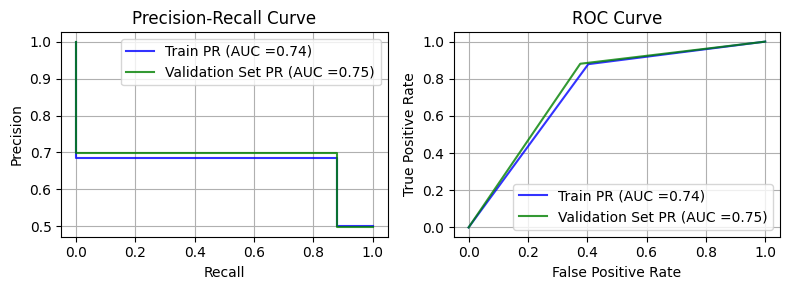



Model: RandomForestClassifier


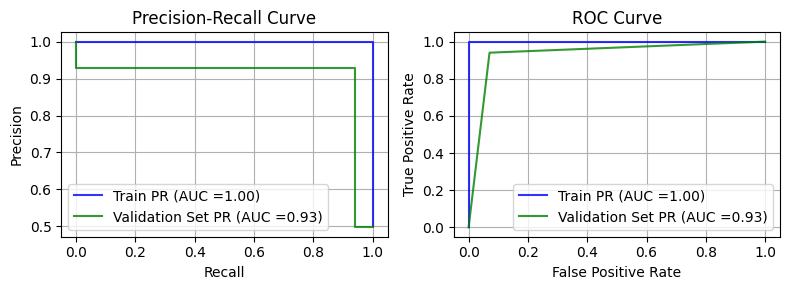



Model: KNeighborsClassifier


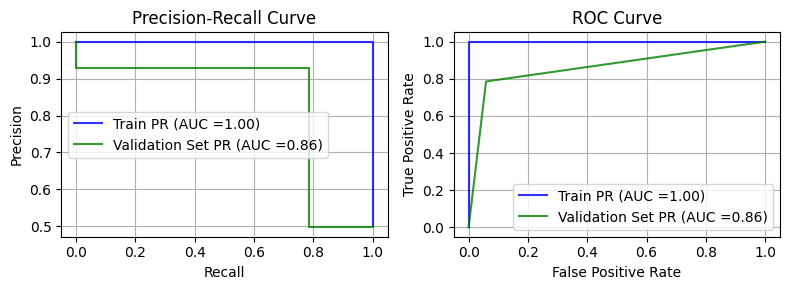



Model: DecisionTreeClassifier


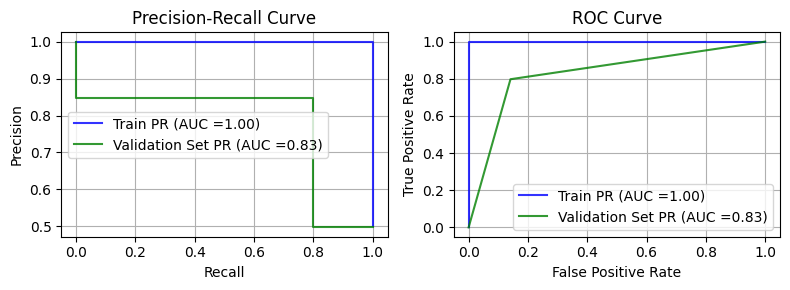



Model: SVC


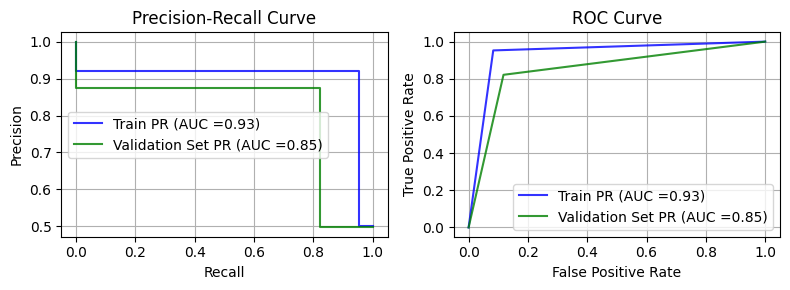

In [33]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
for clf in Classifiers:
    clf.fit(X_train_new, y_train)
    y_pred=clf.predict(X_train_new)
    y_val_pred=clf.predict(X_val_new)
    print(f"Model: {clf.__class__.__name__}")
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred)
    precision_test, recall_test, _ = precision_recall_curve(y_val, y_val_pred)

    fpr_train, tpr_train, _ =roc_curve(y_train, y_pred)
    fpr_test, tpr_test, _ =roc_curve(y_val, y_val_pred)
    roc_auc_train=auc(fpr_train, tpr_train)
    roc_auc_test=auc(fpr_test, tpr_test)

    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)

    plt.step(recall_train, precision_train, color='b', alpha=0.8, where='post', label='Train PR (AUC =%0.2f)' %roc_auc_train)
    plt.step(recall_test, precision_test, color='g', alpha=0.8, where='post', label='Validation Set PR (AUC =%0.2f)' %roc_auc_test)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(fpr_train, tpr_train, color='b', alpha=0.8, label='Train PR (AUC =%0.2f)' %roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='g', alpha=0.8, label='Validation Set PR (AUC =%0.2f)' %roc_auc_test)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()
    print()
    print()

SVC Classifier provide a good balance between precision and recall, and this model show consistent performance across multiple metrics. It provides the best overall performance with highest accuracy, making it the most reliable classifier.

# 9. Deployment

In [34]:
test_data=pd.DataFrame(selector.transform(df_test), columns=X_train.columns[selector.get_support()])
test_data.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,LoanAmount,Total_Income
0,1.0,1.0,0.000000,0.0,1.0,1.0,0.566350,0.341983
1,1.0,1.0,0.333333,0.0,1.0,1.0,0.598035,0.286593
2,1.0,1.0,0.666667,0.0,1.0,1.0,0.715248,0.384917
3,1.0,1.0,0.666667,0.0,1.0,1.0,0.544136,0.302863
4,1.0,0.0,0.000000,1.0,1.0,1.0,0.486329,0.203639


In [35]:
y_test_pred=model5.predict(test_data)
print(y_test_pred[:10])

[1 0 1 1 0 0 0 0 1 1]


In [36]:
org_test_data=pd.read_csv('/content/Loan_Status_test.csv')
submission_file=pd.DataFrame()
submission_file['Loan_ID']=org_test_data['Loan_ID']
submission_file['Loan_Status']=y_test_pred
submission_file['Loan_Status']=submission_file['Loan_Status'].map({1: 'Y', 0: 'N'})
submission_file.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [37]:
submission_file.shape

(367, 2)

# 10. Saving the submission file

In [38]:
submission_file.to_csv('Loan_Status_Submission.csv', index=False)
print('Submission file is saved successfully')

Submission file is saved successfully


# 11. Saving the Model

In [39]:
import pickle
with open('loan_status_model_new.pkl', 'wb') as model_file:
    pickle.dump(model5, model_file)
selector.fit(X_train, y_train)
with open('selector.pkl', 'wb') as selector_file:
    pickle.dump(selector, selector_file)